<a href="https://colab.research.google.com/github/eunbi2000/machine-learning/blob/main/P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE378 Programming Assignment 1 -- Behavior Cloning from Numerical States
In this assignment, we will provide you a dataset and use different machine learning algorithms to implement a basic behavior cloning policy. The robot task is reaching to the block and tring to grasp it.

###Please only add/change the part surrounded by the marks below
```
#====Please write your codes here======

#======================================
```

###Submission

Please submit the required materials through Brightspace. The instructions are below and they are also available in Brightspace:

- Please find the assignment in attached colab or this link https://colab.research.google.com/drive/1_b7bAVz8w0CtCxfedNzQN3s3BaoPhqV5?usp=sharing. Oh you are actually viewing this colab, good job!

- Please use your **@stonybrook.edu** account to access the assignment colab and edit its copy.

- For submission, please submit **(1) a link to your finished colab and (2) a copy of your colab file.**
  - To get the link and share it, please reach to colab top right -- share->general access->select Stony Brook University, and submit the link in this assignment.
  - To get a copy of your colab, reach to colab top left -- file->download->download .ipynb. The format of the submitted filename will follow \<SBUID\>_\<last name\>_\<first name\>_cse378pa1.ipynb. For example: 123445678_carrot_melon_cse378pa1.ipynb

- Note on rubric: the assignment will focus on implementing the algorithm correctly. The actual performance e.g., evaluation results is not important.&nbsp;</first></last></sbu>

Now, let's begin!

**Check whether you are connected to a GPU runtime**

For this tutorial, we **don't** need GPU.

If you want to use GPU, and the cell below (after you run it) says False, you need to go to top right (where it shows "RAM", "Disk" or "Connect"). Click the drop down and then "Change runtime type". Select "T4 GPU". If it warns you delete the current runtime, click "OK".

In [ ]:
import torch
torch.cuda.is_available()

False

**Install dependencies**

You don't need to modify this.

It takes ~10 mins to install pybullet for the first time. Be patient. You will see the elapsed time in the status bar at the bottom of this page.

In [ ]:
!pip install ftfy regex tqdm fvcore imageio moviepy
!pip install -U --no-cache-dir gdown --pre
!pip install pybullet
!pip install easydict
!pip install imageio-ffmpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 396.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 896.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=20677872dafa8fa5459c6bad2c01ca562e664fb41e4f9b77c3791f28280844f5
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31530 sha256=01ded7b19e0611b01d56d4cf57b7602ea287e2c5e366e6452f114ec89d8fb819
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built fvcore iopath
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Su

**Download 3d models**

You don't need to modify this.


In [ ]:
import os
if not os.path.exists('ur5e/ur5e.urdf'):
  !gdown --id 1Cc_fDSBL6QiDvNT4dpfAEbhbALSVoWcc
  !gdown --id 1yOMEm-Zp_DL3nItG9RozPeJAmeOldekX
  !gdown --id 1GsqNLhEl9dd4Mc3BM0dX3MibOI1FVWNM
  !unzip ur5e.zip
  !unzip robotiq_2f_85.zip
  !unzip bowl.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Cc_fDSBL6QiDvNT4dpfAEbhbALSVoWcc
To: /content/ur5e.zip
100% 2.94M/2.94M [00:00<00:00, 72.0MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yOMEm-Zp_DL3nItG9RozPeJAmeOldekX
To: /content/robotiq_2f_85.zip
100% 2.33M/2.33M [00:00<00:00, 50.3MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com

**Download prepared simulated environment implementation**

In [ ]:
import os
if not os.path.exists('env'):
  !gdown --id --folder 1lTSXnzcxmhHde0ZciDUjwuGpWKYcca9q

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder list
Processing file 1lU3DkL9aOFLeDPpSZREWI10edUBRDogJ __init__.py
Processing file 1lZsvJOeiR6bmAk1IzDaS0FGnCO6ajwn7 base_env.py
Processing file 1lZXtHAl-ZXgVL3m71-vSB8M1ukSqTA06 pick_env.py
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From (uriginal): https://drive.google.com/uc?id=1lU3DkL9aOFLeDPpSZREWI10edUBRDogJ
From (redirected): https://drive.google.com/uc?id=1lU3DkL9aOFLeDPpSZREWI10edUBRDogJ&confirm=t&uuid=0fa76156-9845-4567-9a20-7551be839e04
To: /content/env/__init__.py
100% 44.0/44.0 [00:00<00:00, 167kB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=1lZsvJOeiR6bmAk1IzDaS0FGnCO6ajwn7
From (redirected): https://drive.google.com/uc?id=1lZsvJOeiR6bmAk1IzDaS0FGnCO

**Download dataset**

In [ ]:
import os
if not os.path.exists('pa1_grasp_dataset.pkl'):
  !gdown --id 1lXRLmG1uGrTir9CkLXYgJV9-JSmZ2KTQ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1lXRLmG1uGrTir9CkLXYgJV9-JSmZ2KTQ
From (redirected): https://drive.google.com/uc?id=1lXRLmG1uGrTir9CkLXYgJV9-JSmZ2KTQ&confirm=t&uuid=1ac2a64d-25a9-49ae-9437-b7ff7ea3c13c
To: /content/pa1_grasp_dataset.pkl
100% 329M/329M [00:02<00:00, 112MB/s]


In [ ]:
# import packages we need

import torch        # for machine learning
import numpy as np  # for basic arrays
import pickle       # for loading data

from env import PickObjectEnv # import the simulated environment

In [ ]:
# function to load our behavior cloning dataset
def load_dataset(dataset_filename):
    with open(dataset_filename, "rb") as f:
        dataset = pickle.load(f)
        return dataset

# lets load the dataset
dataset = load_dataset("pa1_grasp_dataset.pkl")


# The dataset format is like below
# data = {
#   "image_obs": np.ndarray,
#   "joint_state": np.ndarray,
#   "position_state": np.ndarray,
#   "action": np.ndarray
# }
# check some details of it
print (f"# datapoints in the dataset: {len(dataset['image_obs'])}")
print (f"Shape of image observations {dataset['image_obs'].shape}") # should be (N, 240, 240, 3)
print (f"Shape of states {dataset['joint_state'].shape}")           # should be (N, 10)
print (f"Shape of states {dataset['position_state'].shape}")        # should be (N, 6)
print (f"Shape of actions {dataset['action'].shape}")               # should be (N, 4), 3 for moving direction and 1 for the gripper

# datapoints in the dataset: 1900
Shape of image observations (1900, 240, 240, 3)
Shape of states (1900, 10)
Shape of states (1900, 6)
Shape of actions (1900, 4)


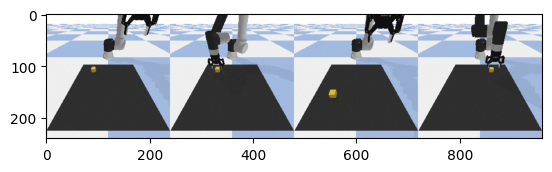

In [ ]:
# Take a look of several samples in the dataset
import matplotlib.pyplot as plt
%matplotlib inline
indices = [0,30,300,1000]
sample_image = np.hstack([i for i in dataset["image_obs"][indices]])
plt.imshow(sample_image)

In [ ]:
# let's split the data into training and evaluation set
# we naively use the first 80% to train and last 20% for evaluation
dataset_len = len(dataset["image_obs"])
train_len = int(dataset_len*0.8)
# training set
train_set = {
    "image_obs": dataset["image_obs"][:train_len],
    "joint_state": dataset["joint_state"][:train_len],
    "position_state": dataset["position_state"][:train_len],
    "action": dataset["action"][:train_len]
}
# evaluation set
eval_set = {
    "image_obs": dataset["image_obs"][train_len:],
    "joint_state": dataset["joint_state"][train_len:],
    "position_state": dataset["position_state"][train_len:],
    "action": dataset["action"][train_len:]
}

# check them
print (f"intended training set length {train_len}")
print (f"# datapoints in the training set: {len(train_set['image_obs'])}")
print (f"# datapoints in the evaluation set: {len(eval_set['image_obs'])}")

intended training set length 1520
# datapoints in the training set: 1520
# datapoints in the evaluation set: 380


In [ ]:
# a base class for you to develop your own algorithm and for evaluation the performance
# you don't need to modify this
# but taking a look is good for understanding the machine learning and robot learning pipeline
class Algorithm:

    def __init__(self, model=None):
        self.model = model # put your model here, if you need it (e.g. a neural network)

    # in the following section, you will need to implement this function
    # Note: you don't need to change everything in this exact code cell
    def policy(self, input_state: np.ndarray) -> np.ndarray:
        """
        args:
        input_state: input state in shape (B, D) where N is the length of the batch and D is the dimension of the state (feature)
        return:
        an np.ndarray action vector in shape (B, 4)
        """
        raise NotImplementedError

    # in the following section, you will need to implement this function to
    # train (using neural network) or initialize (using linear regression / nearest neighbor) your model
    def train(self, train_set):
        pass

    # method to evaluate your policy
    def eval(self, eval_set, input_state_type="position_state"):
        eval_len = len(eval_set["image_obs"])
        errors = []
        for i in range(eval_len):
            obs = eval_set[input_state_type][i]
            target_action = eval_set["action"][i]
            pred_action = self.policy(obs[None,])[0]
            errors.append(np.linalg.norm(target_action - pred_action))
        print (f"Evaluation on dataset, errors: {np.mean(errors):.4f}")

    # optinally, you can try to evaluate in an environment
    def eval_in_env(self, input_state_type="position_state", eval_num=3):
        config = {
            "pick": ["yellow block"] # currently we support {red, blue, green, yellow}
        }
        env = PickObjectEnv()
        all_rewards = []
        for eval_ep in range(eval_num):
            obs = env.reset(config)
            done = False
            rewards = 0
            step_count = 0
            while step_count < 80: # reduce this if it takes to long to evaluate
                input_state = self.get_input_state_from_obs(obs, input_state_type)[None, :]
                action = self.policy(input_state)[0]
                obs, reward, done, _, _ = env.step(action)
                rewards += reward
                step_count += 1
            all_rewards.append(rewards)
            env.show_env_record()
        print (f"Evaluation on envs, result: {np.mean(all_rewards):.4f} +/- {np.std(all_rewards):.4f}")


    # you won't worry about this
    def get_input_state_from_obs(self, obs, input_state_type):
        if input_state_type == "joint_state":
            return np.concatenate([obs["joint_state"], obs["block_position"]])
        elif input_state_type == "position_state":
            return np.concatenate([obs["ee_position"], obs["block_position"]])
        elif input_state_type == "image_obs":
            return obs["image_obs"]


As introduced in the class, to describe the status of the environment, we can use either numerical states (from some measurements), or image observations.
In this assignment, we will mainly use the numerical states.

## 1. Nearest neighbor using position states

Let's first use "position_states" in the given dataset because it is easier for the model.
Since the task is to reach and grasp the target block, the positions of the robot arm (end-effector) and the target block are enough to describe the environment.
The "position_states" in the dataset are designed to contain such information.
As shown above, they are in the shape of (N, 6).
N is the length of the whole dataset, so let's focus on (6), the dimension of each state.
The first 3 dimensions correspond to the coordinates of the end effector of the robot arm. The last 3 correspond to the coordinates of the target block.

The objective is to write a nearest neighbor algorithm that takes in a state, and find the target action according to its nearest neighbor in the training set.
A summary is below:

- Input: "position_states"
- Output: "action"
- Algorithm: nearest neighbor

In [ ]:
class NearestNeighbor(Algorithm):
    def __init__(self, model=None):
        self.train_set = None

    def policy(self, input_state: np.ndarray) -> np.ndarray:
        # Instruction: please write how your model will give output action given an input state
        # Hint: compare your input state with your training dataset and return a suitable action
        # you may not necessarily use Pytorch here. Either Numpy or Pytorch is good.
        # Shape of input_state: (1, D) np.ndarray, D is the dimension of state vector, which is 6 in this part
        # Shape of the desired output: (1, 4) np.ndarray
        #====Please write your codes here======
        res = np.array([1,4])
        #len(train_set['position_state'])
        # print(train_set['position_state'][0][0])
        # print(input_state[0][0])
        min = float('inf')
        for i in range(len(train_set['position_state'])):
          temp = 0.0
          for j in range(6):
            temp += train_set['position_state'][i][j] - input_state[0][j]
          if (temp < min):
            min = temp
            res = train_set['action'][i]

        return res
        #======================================

    def train(self, train_set):
        # remember the training set, which will be used in your policy
        # this method is called "train", but actually you don't need training in nearest neighbor algorithm
        self.train_set = train_set

nearest_neighbor_algorithm = NearestNeighbor()
nearest_neighbor_algorithm.train(train_set)
nearest_neighbor_algorithm.eval(eval_set)
# nearest_neighbor_algorithm.eval_in_env(input_state_type="position_state", eval_num=3) # optinally you can test in the env!

Evaluation on dataset, errors: 0.1282


## 2. Linear regression using position states
Now let's move a step further to use linear regression for the same type of input (position states)

A summary is below:

- Input: "position_states"
- Output: "action"
- Algorithm: Linear Regression

In [ ]:
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Instruction: define your linear regression model here using pytorch
        #====Please write your codes here======
        self.linear = torch.nn.Linear(6, 4)

        #======================================

    def forward(self, x):
        # Instruction: define how you will calculate the predicted action from the input state (x)
        #               using your defined linear regression model
        #====Please write your codes here======
        out = self.linear(x).float()
        return out

        #======================================

class LinearRegression(Algorithm):
    def __init__(self, model: LinearRegressionModel):
        self.model = model

    def policy(self, input_state: np.ndarray) -> np.ndarray:
        # Instruction: please write how your model will give output action given an input state
        # Hint: some parts will be similar to train(), since in train() you are also required to
        #       generate actions from your model
        # Hint: when to use pytorch layers, you need to convert ndarray to pytorch tensor
        #       after you get the result from the layer, convert the tensor to ndarray using ".numpy()"
        #       Example: input_state = torch.tensor(input_state)
        #                output_action = yourlayer(input_state).numpy()
        #       If you are using GPU:
        #       Example: input_state = torch.tensor(input_state).cuda()
        #                output_action = yourlayer(input_state).detach().cpu().numpy()
        # Shape of input_state: (1, D) np.ndarray, D is the dimension of state vector, which is 6 in this part
        # Shape of the desired output: (1, 4) np.ndarray
        #====Please write your codes here======
        input_data = torch.tensor(input_state[0])
        predicted = self.model(input_data.float()).data.numpy()
        return predicted

        #======================================

    def train(self, train_set):
        # remember the training set, which will be used in your policy
        self.train_set = train_set
        # Instruction: please write how to train your model (self.model) given the training set.
        #               Recall that a training requries you a loss function, an optimizer, and a
        #               loop to iteratively train your model
        #====Please write your codes here======
        optimizer = torch.optim.Adam((self.model).parameters())
        criterion = nn.MSELoss()
        for epoch in range(len(train_set['position_state'])):
          input_data = torch.tensor(train_set['position_state'][epoch])
          predicted = torch.tensor(train_set['action'][epoch])
          optimizer.zero_grad()
          outputs = self.model(input_data.float())
          loss = criterion(outputs, predicted.float())
          loss.backward()
          optimizer.step()
          # print('epoch {}, loss {}'.format(epoch, loss.item()))
        #======================================

linear_regression_model = LinearRegressionModel()
linear_regression_algorithm = LinearRegression(linear_regression_model)
linear_regression_algorithm.train(train_set)
linear_regression_algorithm.eval(eval_set)
# linear_regression_algorithm.eval_in_env(input_state_type="position_state", eval_num=3) # optinally you can test in the env!

Evaluation on dataset, errors: 0.1414


## 3. "Deep" Learning: Multi-Layer Perceptron (MLP) using position states
Now let's see how a deep learning approach solves this problem.
You are required to implement a MLP as your policy.
The exact style of the MLP is not constrained, but you need to:
 - At least having 3 linear layers in MLP.
 - Having activation functions in between them, according to the lecture.

A summary is below:

- Input: "position_state"
- Output: "action"
- Algorithm: MLP

In [ ]:
import torch.nn as nn
class MLPModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Instruction: define your MLP here using pytorch
        # Hint: something like
        # self.model = nn.Sequential(
        #     nn.Linear(),
        #     ...
        # )
        #====Please write your codes here======
        hidden_units = 256
        self.model = nn.Sequential(
            nn.Linear(6, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, 4)
        )
        #======================================

    def forward(self, x):
        # Instruction: define how you will calculate the predicted action from the input state (x)
        #               using your defined MLP model
        #====Please write your codes here======
        out = self.model(x).float()
        return out

        #======================================

class MLP(Algorithm):
    def __init__(self, model: MLPModel):
        self.model = model

    def policy(self, input_state: np.ndarray) -> np.ndarray:
        # Instruction: please write how your model will give output action given an input state
        # Hint: some parts will be similar to train(), since in train() you are also required to
        #       generate actions from your model
        # Hint: when to use pytorch layers, you need to convert ndarray to pytorch tensor
        #       after you get the result from the layer, convert the tensor to ndarray using ".numpy()"
        #       Example: input_state = torch.tensor(input_state)
        #                output_action = yourlayer(input_state).numpy()
        #       If you are using GPU:
        #       Example: input_state = torch.tensor(input_state).cuda()
        #                output_action = yourlayer(input_state).detach().cpu().numpy()
        # Shape of input_state: (1, D) np.ndarray, D is the dimension of state vector, which is 6 in this part
        # Shape of the desired output: (1, 4) np.ndarray
        #====Please write your codes here======
        input_data = torch.tensor(input_state[0])
        predicted = self.model(input_data.float()).data.numpy()
        return predicted

        #======================================

    def train(self, train_set):
        # remember the training set, which will be used in your policy
        self.train_set = train_set
        # Instruction: please write how to train your model (self.model) given the training set.
        #               Recall that a training requries you a loss function, an optimizer, and a
        #               loop to iteratively train your model
        #====Please write your codes here======
        loss_function = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam((self.model).parameters())

        for epoch in range(len(train_set['position_state'])):
          input_data = torch.tensor(train_set['position_state'][epoch])
          predicted = torch.tensor(train_set['action'][epoch])
          optimizer.zero_grad()
          output = self.model(input_data.float())
          loss = nn.functional.mse_loss(output, predicted.float())
          loss.backward()
          optimizer.step()

        #======================================

mlp_model = MLPModel()
mlp_algorithm = MLP(mlp_model)
mlp_algorithm.train(train_set)
mlp_algorithm.eval(eval_set, input_state_type="position_state")
# mlp_algorithm.eval_in_env(input_state_type="position_state", eval_num=3) # optinally you can test in the env!

Evaluation on dataset, errors: 0.1186


## 4. Using joint states

Now let's try a bit more challenging situation: we move to use joint states instead of positions of the robot. Joint states is not as "straightforward" as those coordinates. Though, we still need to regress a nice target action out of joint robot state and the coordinates of the block.

We will use "joint_state" in the dataset.
The "joint_state" has shape (N, 10), and we will look into (10), which is the dimension of each state.
The first 7 dimensions discribe the status of the robot.
Within it, the first 6 dimensions describe the rotation angles of 6 joints in the robot, and the last dimension indicates the status of the gripper (1 for activated/closed and 0 for deactivated/released).
The last 3 dimensions of the state represents the coordinates of the target block.

The objective is to regress target action out of given "joint_state". You will use MLP model to do this

A summary is below:

- Input: "joint_state"
- Output: "action"
- Algorithm: MLP

In [ ]:
import torch.nn as nn
class MLPModelJointState(nn.Module):
    def __init__(self):
        super().__init__()
        # Instruction: define your MLP here using pytorch
        # Hint: something like
        # self.model = nn.Sequential(
        #     nn.Linear(),
        #     ...
        # )
        #====Please write your codes here======
        hidden_units = 200
        self.model = nn.Sequential(
            nn.Linear(10, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, 4)
        )

        #======================================

    def forward(self, x):
        # Instruction: define how you will calculate the predicted action from the input state (x)
        #               using your defined MLP model
        #====Please write your codes here======
        out = self.model(x).float()
        return out

        #======================================

class MLPJointState(Algorithm):
    def __init__(self, model: MLPModelJointState):
        self.model = model

    def policy(self, input_state: np.ndarray) -> np.ndarray:
        # Instruction: please write how your model will give output action given an input state
        # Hint: some parts will be similar to train(), since in train() you are also required to
        #       generate actions from your model
        # Hint: when to use pytorch layers, you need to convert ndarray to pytorch tensor
        #       after you get the result from the layer, convert the tensor to ndarray using ".numpy()"
        #       Example: input_state = torch.tensor(input_state)
        #                output_action = yourlayer(input_state).numpy()
        #       If you are using GPU:
        #       Example: input_state = torch.tensor(input_state).cuda()
        #                output_action = yourlayer(input_state).detach().cpu().numpy()
        # Shape of input_state: (1, D) np.ndarray, D is the dimension of state vector, which is 10 in this part
        # Shape of the desired output: (1, 4) np.ndarray
        #====Please write your codes here======
        input_data = torch.tensor(input_state[0])
        predicted = self.model(input_data.float()).data.numpy()
        return predicted

        #======================================

    def train(self, train_set):
        # remember the training set, which will be used in your policy
        self.train_set = train_set
        # Instruction: please write how to train your model (self.model) given the training set.
        #               Recall that a training requries you a loss function, an optimizer, and a
        #               loop to iteratively train your model
        #====Please write your codes here======
        loss_function = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam((self.model).parameters())

        for epoch in range(len(train_set['joint_state'])):
          input_data = torch.tensor(train_set['joint_state'][epoch])
          predicted = torch.tensor(train_set['action'][epoch])
          optimizer.zero_grad()
          output = self.model(input_data.float())
          loss = nn.functional.mse_loss(output, predicted.float())
          loss.backward()
          optimizer.step()

        #======================================

mlp_joint_state_model = MLPModelJointState()
mlp_joint_state_algorithm = MLPJointState(mlp_joint_state_model)
mlp_joint_state_algorithm.train(train_set)
mlp_joint_state_algorithm.eval(eval_set, input_state_type="joint_state")
# mlp_algorithm.eval_in_env(input_state_type="position_state", eval_num=3) # optinally you can test in the env!

Evaluation on dataset, errors: 0.1241
